In [1]:
#install.packages("devtools")
#library(devtools)
#devtools::install_github("cefet-rj-dal/event_datasets", force=TRUE)

#Load a series using package - Recommended
#Load package
library(dalevents)

In [49]:
library(daltoolbox)


Attaching package: ‘daltoolbox’


The following object is masked from ‘package:base’:

    transform




In [2]:
data(fi_br)

In [3]:
#Select subset inflation and IPCA index
inflation <- fi_br$Inflation
test <- inflation$IPCA
test <- na.omit(test)

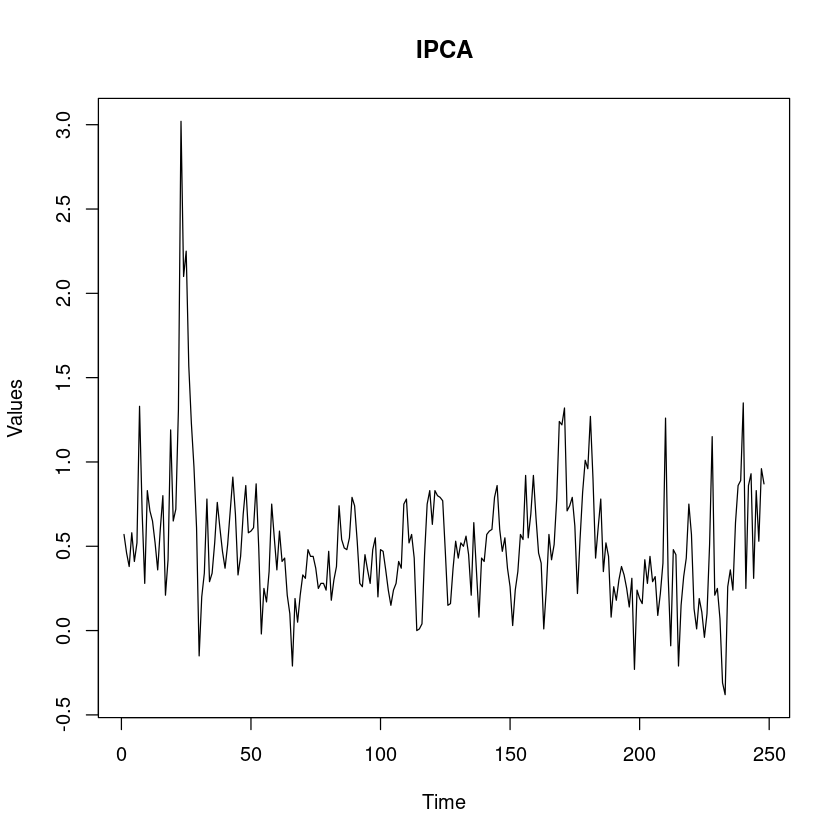

In [23]:
#Plotting original series
plot(ts(test), type = "l",
     main="IPCA",
     ylab="Values")

In [20]:
head(fi_br$Commodity)

,Event,Oil Brent,Oil WTI,Natural Gas (US),Natural Gas (EU),Coffee,Sugar (EU),Sugar (US),Cotton,Fat Ox,⋯,Wheat,Orange,Beef,Aluminum,Iron Ore,Copper,Lead,Nickel,Gold,Silver
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,25.62,29.59,8.17,4.65,1.4546,0.5302111,0.4731,1.4148,40.13,⋯,110.37,0.3489300,1.925515,1615.65,30.03,1787.50,478.1,6994.77,265.49,4.6571
2,0,27.50,29.61,5.63,4.59,1.4813,0.5315339,0.4749,1.3325,39.58,⋯,106.74,0.4071700,1.921988,1604.36,30.03,1765.65,501.8,6524.13,261.87,4.5574
3,0,24.50,27.25,5.16,4.57,1.4661,0.5283923,0.4751,1.2029,39.84,⋯,103.49,0.5548100,1.981733,1509.17,30.03,1738.77,498.4,6133.52,263.03,4.4040
4,0,25.66,27.49,5.17,4.48,1.4579,0.5602998,0.4741,1.1274,41.72,⋯,101.09,0.6297200,1.977103,1496.91,30.03,1664.16,477.5,6329.87,260.48,4.3650
5,0,28.31,28.63,4.21,4.36,1.5260,0.5212383,0.4707,1.1014,40.94,⋯,102.55,0.7343400,2.007747,1538.77,30.03,1682.21,466.7,7060.83,272.36,4.4333
6,0,27.85,27.60,3.71,4.33,1.4088,0.5120583,0.4639,1.0465,40.95,⋯,97.42,0.8305581,2.052942,1466.13,30.03,1608.45,444.1,6641.19,270.23,4.3738


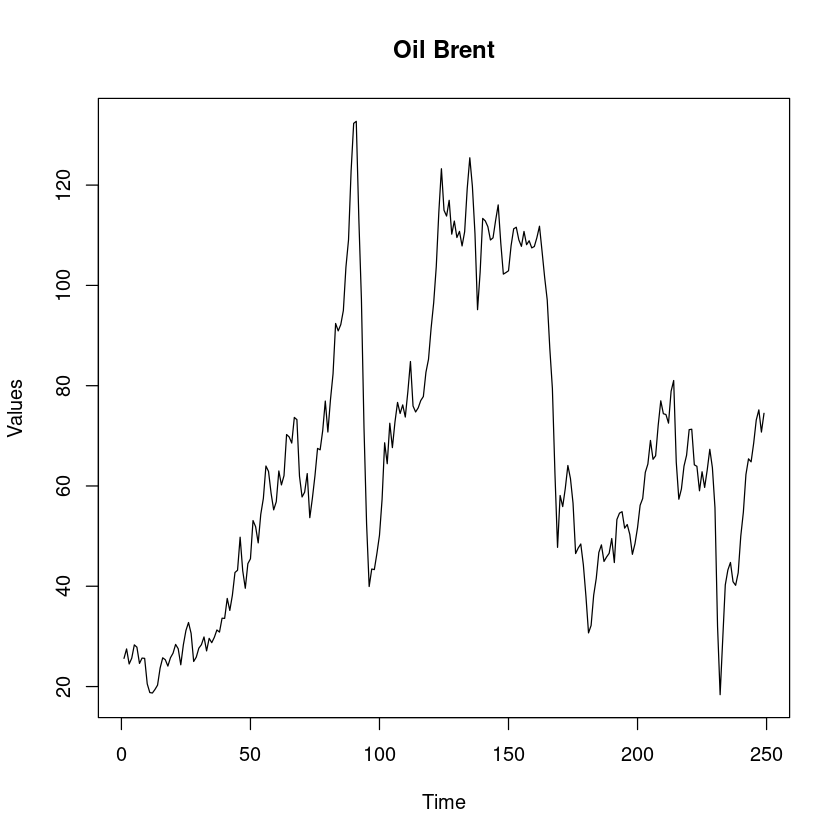

In [24]:
plot(ts(fi_br$Commodity$`Oil Brent`), type = "l",
    main = "Oil Brent",
    ylab="Values")

In [11]:
data(gecco)
gecco <- gecco$gecco

In [15]:
gecco <- gecco[16500:18000,]
head(gecco)

,tp,cl,ph,redox,leit,trueb,cl_2,fm,fm_2,event
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
16500,6.9,0.17,8.37,751,211,0.019,0.110,1796,951,0
16501,6.8,0.17,8.38,751,211,0.019,0.110,1879,944,0
16502,6.8,0.17,8.38,751,211,0.018,0.110,1848,942,0
16503,6.8,0.17,8.37,752,211,0.018,0.110,1836,943,0
16504,6.8,0.17,8.38,752,211,0.019,0.110,1847,939,0
16505,6.8,0.18,8.38,752,211,0.019,0.111,1821,938,0


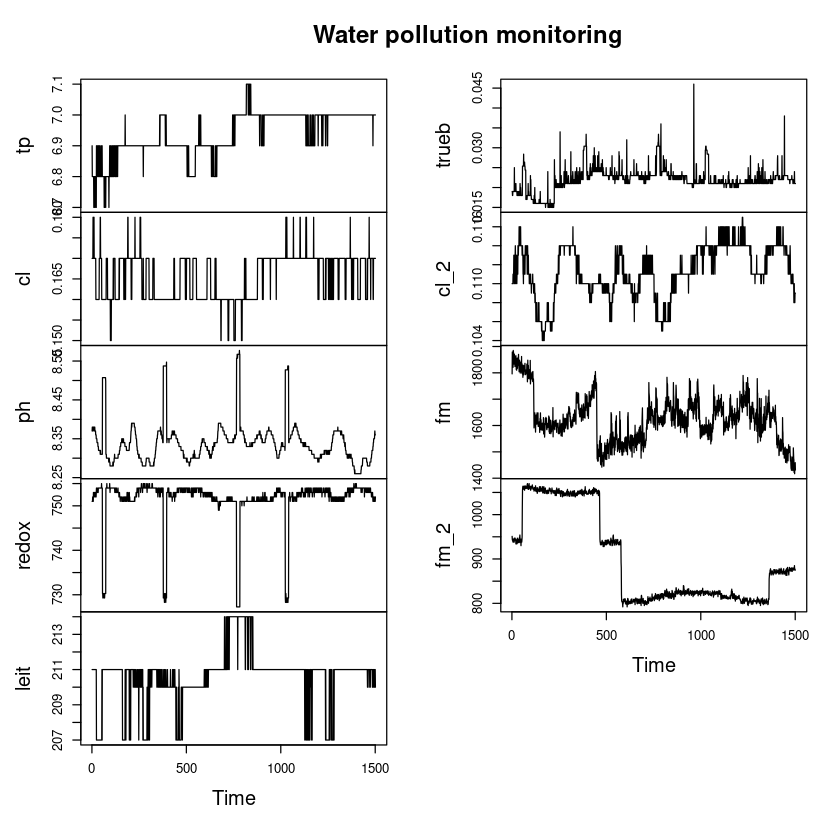

In [25]:
plot(as.ts(gecco[,1:9]),
    main="Water pollution monitoring")

In [26]:
library(harbinger)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [36]:
series <- gecco$ph

In [37]:
labels <- gecco$event

In [50]:
model <- hanr_fbiad() #FBI-AD

In [51]:
model <- fit(model, series)

In [52]:
result <- detect(model, series)

In [53]:
head(result)

,idx,event,type
,<int>,<lgl>,<chr>
1,1,FALSE,
2,2,FALSE,
3,3,FALSE,
4,4,FALSE,
5,5,FALSE,
6,6,FALSE,


In [54]:
# View Detections Metrics -------------------------------------------------
# evaluating the detections
evaluation <- evaluate(model,
                       result$event,
                       labels)

#Confusion matrix
print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      8     19   
FALSE     64    1410 


In [55]:
#Metrics Example
evaluation$accuracy
evaluation$F1

[1] 0.9447035

[1] 0.1616162

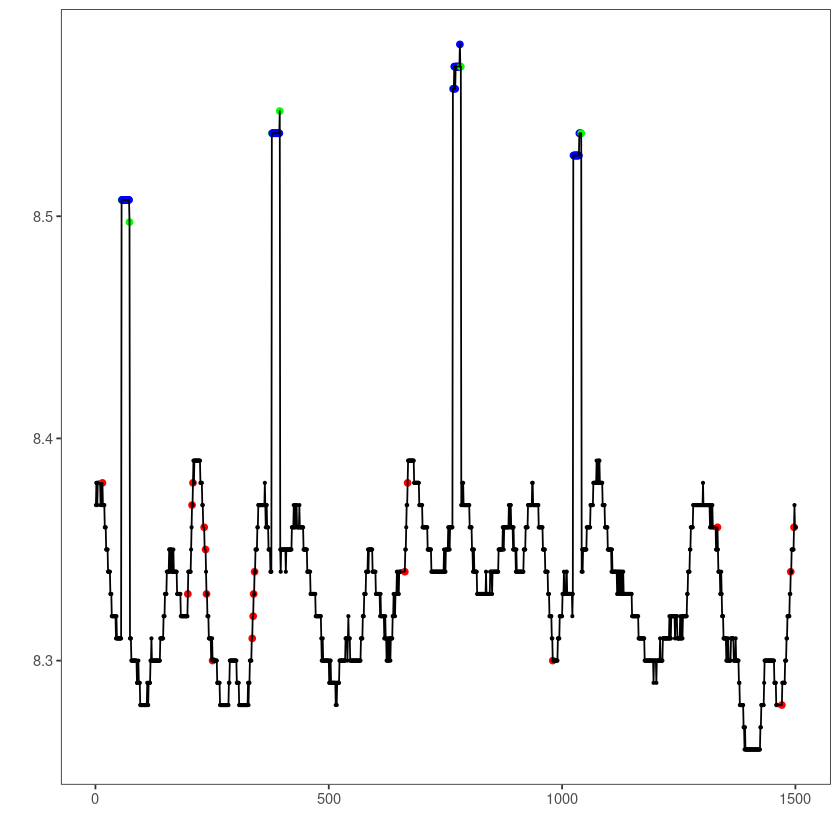

In [56]:
# Visual Analysis ---------------------------------------------------------
# plotting the results
grf <- har_plot(detector, series, result, labels)
plot(grf)